<a href="https://colab.research.google.com/github/tungduongbk/tungduong/blob/master/Uber_usage_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROBLEM 4

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('uber_usage.csv')

In [3]:
df.drop(['CustomerID'], axis = 1, inplace=True)

In [4]:
df['Gender'] = df.Gender.astype('category')

In [5]:
df['Gender_encoded'] = df.Gender.cat.codes
df = df[['Gender', 'Age', 'AnnualSalary', 'Gender_encoded', 'RegularRider']]
df.head()

,Gender,Age,AnnualSalary,Gender_encoded,RegularRider
0,Male,19,19000,1,0
1,Male,35,20000,1,0
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,1,0


In [6]:
data = df.values

In [7]:
X = data[:, 1:4]
Y = data[:, 4]

### a ) Split the dataset to training set and test set using the ratio training set : test set = 7 : 3. The utility model selection.train test split can be used to split the dataset

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
Y_train, Y_test = Y_train.astype('int'), Y_test.astype('int')

### b) Use scikit-learn’s StandardScaler, fit and transform each feature (age, annual salary) into a standard normal distribution. Then use the same parameters of the distributions to transform the test set.

In [10]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)

In [12]:
X_test_scale = scaler.transform(X_test)

### c) Use scikit-learn’s Logistic Regression model linear model.LogisticRegression to train a model on the training set and apply it to the test set.

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model = LogisticRegression(max_iter=100)
model.fit(X_train_scale, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
predict = model.predict(X_test_scale)
predict_proba = model.predict_proba(X_test_scale)[:,1]

### d) Calculate the TP rate, FP rate, FN rate, Precision, Recall, F1 score, and AUC on the training set and test set. Compare the AUC on the training set and test set.

In [16]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_fscore_support

#### Calculate TPR, FPR, Precision, Recall, F1 score, AUC for test set using sklearn metrics

In [17]:
fpr, tpr, thresholds = roc_curve(Y_test, predict_proba) 

[0.         0.         0.         0.01265823 0.01265823 0.02531646
 0.02531646 0.03797468 0.03797468 0.05063291 0.05063291 0.10126582
 0.10126582 0.12658228 0.12658228 0.13924051 0.13924051 0.18987342
 0.18987342 0.32911392 0.35443038 0.51898734 0.51898734 1.        ]
[0.         0.02439024 0.14634146 0.14634146 0.48780488 0.48780488
 0.56097561 0.56097561 0.65853659 0.65853659 0.80487805 0.80487805
 0.87804878 0.87804878 0.92682927 0.92682927 0.95121951 0.95121951
 0.97560976 0.97560976 0.97560976 0.97560976 1.         1.        ]


In [31]:
auc_test = auc(fpr, tpr)
print('AUC on test set = %s'%auc_test)

AUC on test set = 0.9484408768138315


In [19]:
conf_matrix = confusion_matrix(Y_test, predict)
conf_matrix

array([[74,  5],
       [ 8, 33]])

In [34]:
def calculateTPRate(conf_matrix):
    TPR = conf_matrix[0][0]/(conf_matrix[0][1]+conf_matrix[0][0])
    FPR = conf_matrix[1][0]/(conf_matrix[1][0]+conf_matrix[1][1])
    FNR = conf_matrix[0][1]/(conf_matrix[0][1]+conf_matrix[0][0])
    return TPR, FPR, FNR
    
TPR, FPR, FNR = calculateTPRate(conf_matrix)

print('TPR on test set = {0}\nFPR on test set = {1}\nFNR on test set = {2}'
      .format(TPR, FPR, FNR))

TPR on test set = 0.9367088607594937
FPR on test set = 0.1951219512195122
FNR on test set = 0.06329113924050633


In [30]:
(precision_test, recall_test, fscore_test, _) = precision_recall_fscore_support(Y_test, predict, average='macro')

print('Precision on test set = {0}\nRecall on test set = {1}\nF1 Score on test set = {2}'
      .format(precision_test, recall_test, fscore_test))

Precision on test set = 0.8854300385109115
Recall on test set = 0.8707934547699907
F1 Score on test set = 0.8773488481798883


#### Calculate TPR, FPR, Precision, Recall, F1 score, AUC for training set 

In [40]:
predict_train = model.predict(X_train_scale)
predict_proba_train = model.predict_proba(X_train_scale)[:,1]
fpr_train, tpr_train, thresholds_train = roc_curve(Y_train, predict_proba_train)

In [43]:
auc_train = auc(fpr_train, tpr_train)
print('AUC on training set = %s'%auc_train)

AUC on training set = 0.9163361974003085


In [44]:
conf_matrix_train = confusion_matrix(Y_train, predict_train)
conf_matrix_train

array([[163,  15],
       [ 31,  71]])

In [46]:
TPR, FPR, FNR = calculateTPRate(conf_matrix_train)
print('TPR on training set = {0}\nFPR on training set = {1}\nFNR on training set = {2}'
      .format(TPR, FPR, FNR))

TPR on training set = 0.9157303370786517
FPR on training set = 0.30392156862745096
FNR on training set = 0.08426966292134831


In [65]:
(precision_train, recall_train, fscore_train, _) = precision_recall_fscore_support(Y_train, predict_train, average='macro')

print('Precision on training set = {0}\nRecall on training set = {1}\nF1 Score on training set = {2}'
      .format(precision_train, recall_train, fscore_train))

Precision on training set = 0.8328937904579238
Recall on training set = 0.8059043842256004
F1 Score on training set = 0.8158316174788378


### FROM THE RESULTS ON TRAINING SET AND TEST SET: AUC ON TEST SET > AUC ON TRAINING SET

## e) Visualize the feature values and labels of the training set using a scatter plot. Visualize the feature values and decisions on another scatter plot.

### Visualize training set with scatter plot

In [58]:
Y_train = pd.DataFrame(Y_train)
Y_train.columns = ['RegularRider']

In [62]:
df_train = pd.DataFrame(X_train)
df_train.columns = ['Age', 'AnnualSalary', 'Gender_encoded']
df_train = pd.concat([df_train, Y_train], axis = 1)

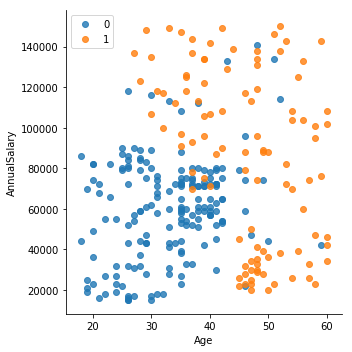

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="Age", y="AnnualSalary", data= df_train, fit_reg=False, hue='RegularRider', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='upper left')
 
plt.show()


### Visualize the feature values and decisions on another scatter plot

In [66]:
predicted = pd.DataFrame(predict)
predicted.columns = ['RegularRider']

In [67]:
df_test = pd.DataFrame(X_test)
df_test.columns = ['Age', 'AnnualSalary', 'Gender_encoded']
df_test = pd.concat([df_test, predicted], axis = 1)

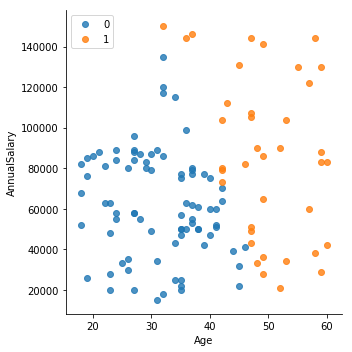

In [68]:
sns.lmplot( x="Age", y="AnnualSalary", data= df_test, fit_reg=False, hue='RegularRider', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='upper left')
 
plt.show()